# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv('sinasc_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
sinasc.loc[(sinasc['APGAR5']>=0) & (sinasc['APGAR5']<=3), 'APGAR5_CAT'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5']>=4) & (sinasc['APGAR5']<=5), 'APGAR5_CAT'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5']>=6) & (sinasc['APGAR5']<=7), 'APGAR5_CAT'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5']>=8) & (sinasc['APGAR5']<=10), 'APGAR5_CAT'] = 'normal'
sinasc[['APGAR5_CAT']].value_counts()

APGAR5_CAT      
normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
dtype: int64

In [3]:
sinasc['APGAR5'].value_counts()

9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: APGAR5, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

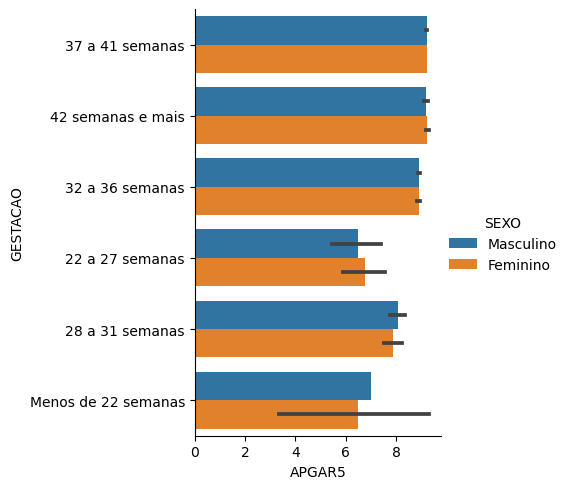

In [4]:
sns.catplot(x='APGAR5', y='GESTACAO'
            , hue = 'SEXO'
            , kind='bar'
            , estimator = 'mean'
            , data=sinasc
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
apgar_gest = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
apgar_gest

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
#Calculei os percentuais de linha dividindo o valor da casa pelo valor da soma total da linha:
apgar_gest_pctlin = apgar_gest.div(apgar_gest.sum(axis = 1), axis = 0)
apgar_gest_pctlin


APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [7]:
#confirmando a soma da porcentagem:
apgar_gest_pctlin.sum(axis = 1) 

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

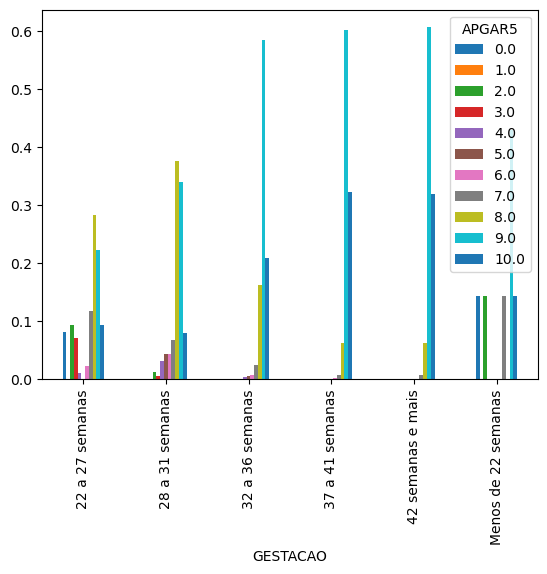

In [8]:
#grafico da tabela cruzada da porcentagem do frequencia do APGAR5 com o periodo da GESTACAO:
plt = apgar_gest_pctlin.plot.bar()

#Podemos notar no gráfico acima que nos periodos abaixo de 37 semanas há maior indice de valores de APGAR5 mais baixos que se categorizam em riscos de asfixia. Portanto esse conjunto de dados corrobora com a afirmaçao dos medicos.


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

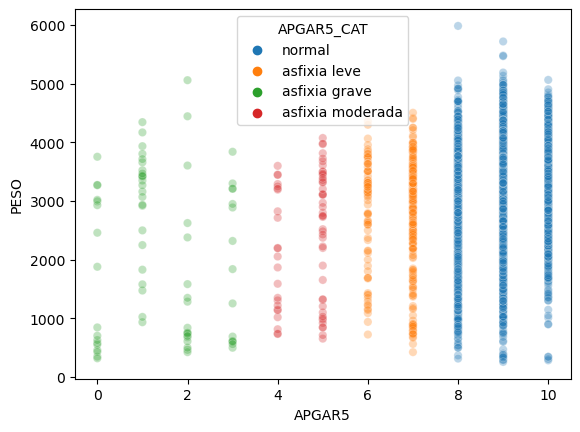

In [12]:
sns.scatterplot(x = 'APGAR5'
                , y = 'PESO'
                , data = sinasc
                , alpha = 0.3
                , hue = 'APGAR5_CAT'
               )

<Axes: xlabel='PESO', ylabel='APGAR5'>

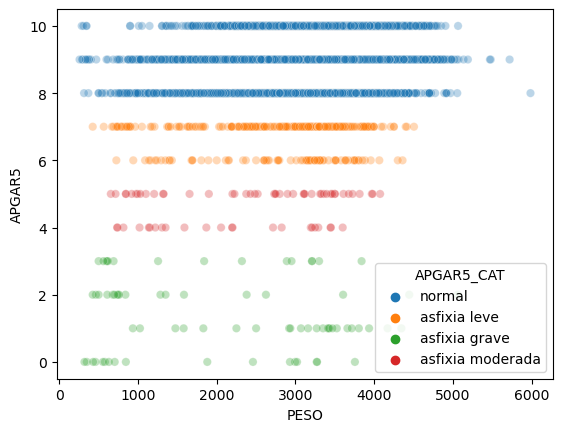

In [13]:
sns.scatterplot(x = 'PESO'
                , y = 'APGAR5'
                , data = sinasc
                , alpha = 0.3
                , hue = 'APGAR5_CAT'
               )

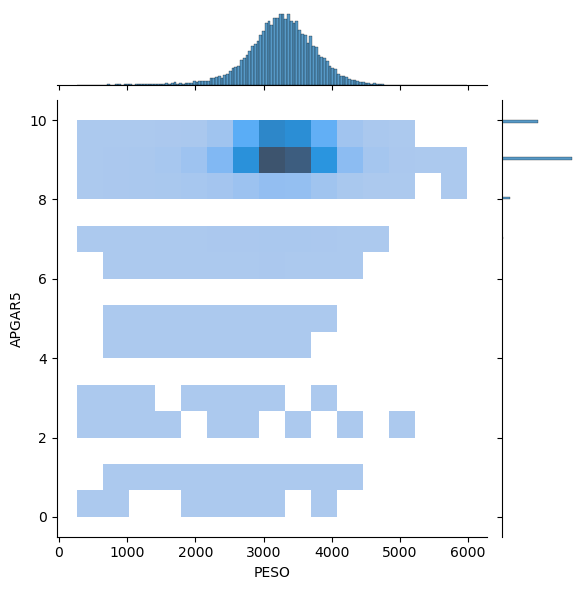

In [15]:
sns.jointplot(x = 'PESO'
             , y = 'APGAR5'
             , data = sinasc
             , kind="hist"
             , bins = [15, 15])

In [27]:
correlacao = sinasc['PESO'].corr(sinasc['APGAR5'])
correlacao
#O resultado da correlação entre o 'PESO' do bebe e 'APGAR5' é de 0.168, o que indica uma correlação fraca entre essas variáveis. 

0.16821001802434468